In [41]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
def bolts(A2, A3, x, x_o):
    A1 = 303
    a = []
    for i in range(len(A2)):
        b = A2[i] + (A2[i] - A1)/(1+np.exp((x-x_o[i])/A3[i]))
        a.append(b)
    return(np.array(a))

In [43]:
# def bolts_int(A2, A3, x, x_o):
#     A1 = 303
#     b = A2 + (A2-A1)/(1+np.exp((x-x_o)/A3))
#     return b

In [44]:
A2 = np.linspace(1500, 2200, 1000)
A3 = np.linspace(10e-1, 1, 10)
x_o = np.linspace(0, 3, 10)
x = np.linspace(0, 3, 300)

In [45]:
# A2 = 1700

# A3 = 0.1

# x =  np.linspace(-0, 3, 1000)

# x_o = 2#6.5/7*3

In [46]:
def repeat(arr, count):
    return np.ravel(np.stack([arr for _ in range(count)], axis=0))

In [47]:
X_o = repeat(x_o, 1000)

A_2 = repeat(A2, 10)

A_3 = repeat(A3, 1000)

In [48]:
a2 = bolts(A_2, A_3, x, X_o)

In [49]:
a2.shape

(10000, 300)

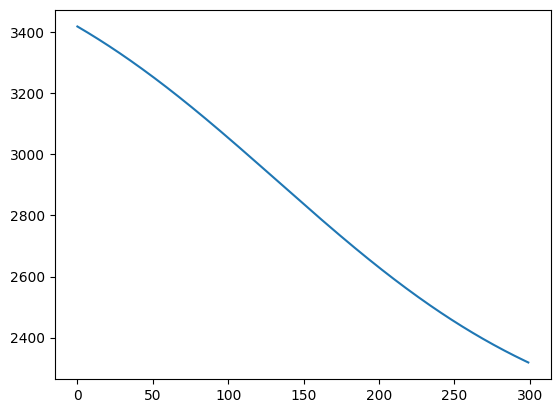

In [50]:
plt.plot(a2[1774])

In [51]:
np.save('profile', a2)

In [56]:
asdf = np.column_stack((A_2, A_3, X_o))

In [57]:
asdf

array([[1.50000000e+03, 1.00000000e+00, 0.00000000e+00],
       [1.50070070e+03, 1.00000000e+00, 3.33333333e-01],
       [1.50140140e+03, 1.00000000e+00, 6.66666667e-01],
       ...,
       [2.19859860e+03, 1.00000000e+00, 2.33333333e+00],
       [2.19929930e+03, 1.00000000e+00, 2.66666667e+00],
       [2.20000000e+03, 1.00000000e+00, 3.00000000e+00]])

In [58]:
np.save('param', asdf)